In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable


In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001


In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [4]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [5]:
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))


Epoch [5/60], Loss: 4.9299
Epoch [10/60], Loss: 2.1247
Epoch [15/60], Loss: 0.9882
Epoch [20/60], Loss: 0.5277
Epoch [25/60], Loss: 0.3411
Epoch [30/60], Loss: 0.2655
Epoch [35/60], Loss: 0.2347
Epoch [40/60], Loss: 0.2222
Epoch [45/60], Loss: 0.2171
Epoch [50/60], Loss: 0.2149
Epoch [55/60], Loss: 0.2140
Epoch [60/60], Loss: 0.2135


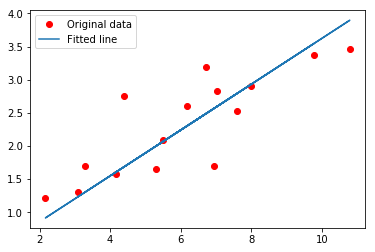

In [6]:
%matplotlib inline
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [ ]:
torch.save(model.state_dict(), 'model.pkl')

In [7]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [8]:
# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [9]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)


Processing
Done!


In [10]:
test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())


In [11]:
# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [12]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out



In [13]:
model = LogisticRegression(input_size, num_classes)

In [14]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [15]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch: [1/5], Step: [100/600], Loss: 2.1971
Epoch: [1/5], Step: [200/600], Loss: 2.0845
Epoch: [1/5], Step: [300/600], Loss: 2.0577
Epoch: [1/5], Step: [400/600], Loss: 1.9803
Epoch: [1/5], Step: [500/600], Loss: 1.8951
Epoch: [1/5], Step: [600/600], Loss: 1.7557
Epoch: [2/5], Step: [100/600], Loss: 1.7800
Epoch: [2/5], Step: [200/600], Loss: 1.6423
Epoch: [2/5], Step: [300/600], Loss: 1.6390
Epoch: [2/5], Step: [400/600], Loss: 1.5582
Epoch: [2/5], Step: [500/600], Loss: 1.5641
Epoch: [2/5], Step: [600/600], Loss: 1.4426
Epoch: [3/5], Step: [100/600], Loss: 1.4284
Epoch: [3/5], Step: [200/600], Loss: 1.3471
Epoch: [3/5], Step: [300/600], Loss: 1.3260
Epoch: [3/5], Step: [400/600], Loss: 1.3668
Epoch: [3/5], Step: [500/600], Loss: 1.2721
Epoch: [3/5], Step: [600/600], Loss: 1.3012
Epoch: [4/5], Step: [100/600], Loss: 1.1877
Epoch: [4/5], Step: [200/600], Loss: 1.0875
Epoch: [4/5], Step: [300/600], Loss: 1.2097
Epoch: [4/5], Step: [400/600], Loss: 1.1151
Epoch: [4/5], Step: [500/600], L

In [16]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the model on the 10000 test images: 82 %
